## Gathering the data
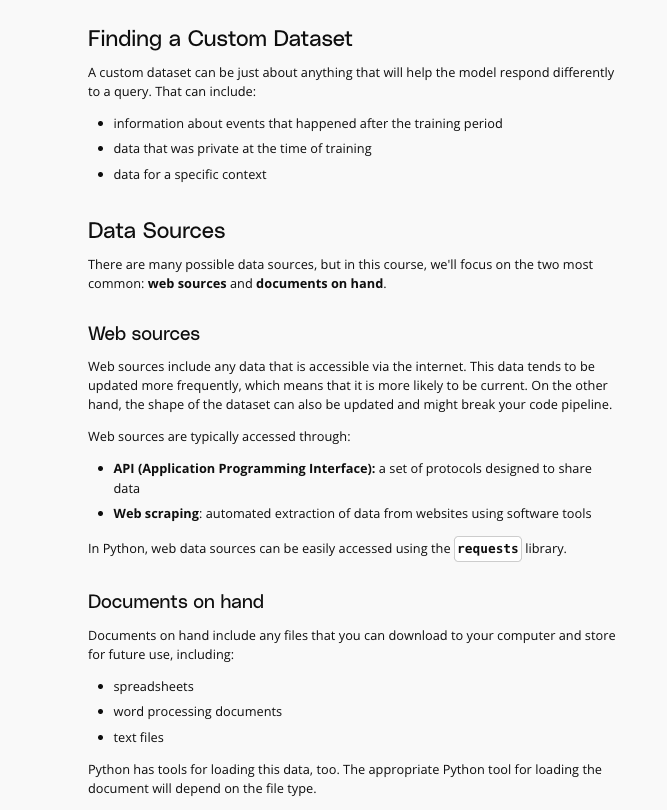 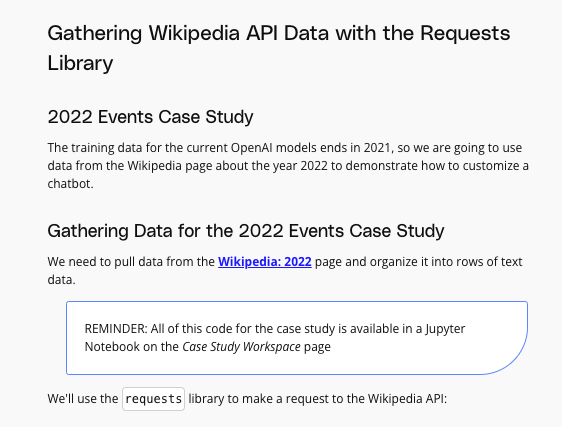 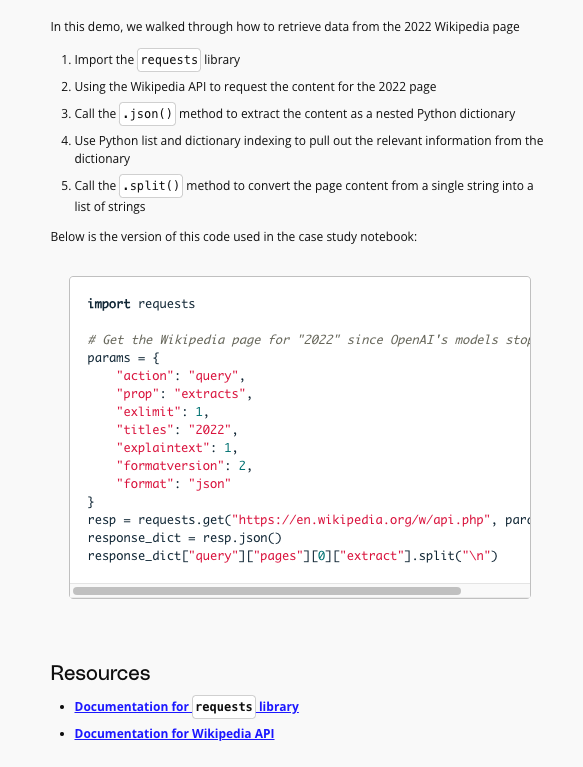

### Preparing a Dataset

In [1]:
import requests 

In [2]:
response = requests.get("https://en.wikipedia.org/w/api.php?action=query&prop=extracts&exlimit=1&titles=2022&explaintext=1&formatversion=2&format=json")

In [3]:
print(response) 

<Response [200]>


In [4]:
response.json() # this is the entire response from the API

{'batchcomplete': True,
 'query': {'pages': [{'pageid': 52412,
    'ns': 0,
    'title': '2022',
    'extract': '2022 (MMXXII) was a common year starting on Saturday of the Gregorian calendar, the 2022nd year of the Common Era (CE) and Anno Domini (AD) designations, the 22nd  year of the 3rd millennium and the 21st century, and the  3rd   year of the 2020s decade.  \nThe year saw the removal of nearly all COVID-19 restrictions and the reopening of international borders in most countries, while the global rollout of COVID-19 vaccines continued. The global economic recovery from the pandemic continued, though many countries experienced an ongoing inflation surge; in response, many central banks raised their interest rates to landmark levels. The world population reached eight billion people in 2022. The year also witnessed numerous natural disasters, including two devastating Atlantic hurricanes (Fiona and Ian), and the most powerful volcano eruption of the century so far. The later part

In [5]:
response.json()['query']['pages'][0]['extract'].split('\n')

['2022 (MMXXII) was a common year starting on Saturday of the Gregorian calendar, the 2022nd year of the Common Era (CE) and Anno Domini (AD) designations, the 22nd  year of the 3rd millennium and the 21st century, and the  3rd   year of the 2020s decade.  ',
 'The year saw the removal of nearly all COVID-19 restrictions and the reopening of international borders in most countries, while the global rollout of COVID-19 vaccines continued. The global economic recovery from the pandemic continued, though many countries experienced an ongoing inflation surge; in response, many central banks raised their interest rates to landmark levels. The world population reached eight billion people in 2022. The year also witnessed numerous natural disasters, including two devastating Atlantic hurricanes (Fiona and Ian), and the most powerful volcano eruption of the century so far. The later part of the year also saw the first public release of ChatGPT by OpenAI starting an arms race in artificial inte

In [6]:
import pandas as pd

df = pd.DataFrame()

df # we have an empty dataframe

Empty DataFrame
Columns: []
Index: []

In [7]:
# Now try to set the above data to the df as list of strings

df['text'] = response.json()['query']['pages'][0]['extract'].split('\n')
df

text
0    2022 (MMXXII) was a common year starting on Sa...
1    The year saw the removal of nearly all COVID-1...
2    2022 was also dominated by wars and armed conf...
3                                                     
4                                                     
..                                                 ...
254                                                   
255                                 == Nobel Prizes ==
256                                                   
257                                                   
258                                   == References ==

[259 rows x 1 columns]

In [8]:
# Handle the empty strings 
df = df[df['text'].str.len() >0]
df # Now we do not have any black lines here 

text
0    2022 (MMXXII) was a common year starting on Sa...
1    The year saw the removal of nearly all COVID-1...
2    2022 was also dominated by wars and armed conf...
5                                         == Events ==
8                                      === January ===
..                                                 ...
248                                 == Demographics ==
249  The world population was estimated to have rea...
252                                       == Deaths ==
255                                 == Nobel Prizes ==
258                                   == References ==

[225 rows x 1 columns]

In [9]:
# Now let's deal with the headings also

df = df[~df['text'].str.startswith("==")] # Now we do not have any rows which starts with == also which means we have almost clean data in hand 
df

text
0    2022 (MMXXII) was a common year starting on Sa...
1    The year saw the removal of nearly all COVID-1...
2    2022 was also dominated by wars and armed conf...
9     January 1 – The Regional Comprehensive Econom...
10   January 2 – Abdalla Hamdok resigns as Prime Mi...
..                                                 ...
242  December 21–December 26 – A major winter storm...
243  December 24 – 2022 Fijian general election: Th...
244  December 29 – Brazilian football legend Pelé d...
245  December 31 – Former Pope Benedict XVI dies at...
249  The world population was estimated to have rea...

[208 rows x 1 columns]

In [10]:
df.tail(20)

text
224  November 16 – NASA launches Artemis 1, the fir...
225  November 19 – The 2022 Malaysian general elect...
226  November 19–November 26 – The 2022 Central Ame...
227  November 20–December 18 – The 2022 FIFA World ...
228  November 20 – 2022 Nepalese general election: ...
229  November 21 – A 5.6 earthquake strikes near Ci...
230  November 30 – OpenAI releases ChatGPT, an arti...
234  December 2 – The G7 and Australia join the EU ...
235  December 5 – The National Ignition Facility ac...
236                                         December 7
237  The Congress of Peru removes President Pedro C...
238  After substantial protests against China's Zer...
239  December 17 – Leo Varadkar succeeds Micheál Ma...
240  December 18 – Argentina wins the 2022 FIFA Wor...
241  December 19 – At the UN Biodiversity Conferenc...
242  December 21–December 26 – A major winter storm...
243  December 24 – 2022 Fijian general election: Th...
244  December 29 – Brazilian football legend Pelé d...
245  December 31 – Former Pope Benedict XVI dies at...
249  The world population was estimated to have rea...

In [11]:
from dateutil.parser import parse
prefix = ""
for (i, row) in df.iterrows():
    # If the row already has " - ", it already has the needed date prefix
    if " – " not in row["text"]:
        try:
            # If the row's text is a date, set it as the new prefix
            parse(row["text"])
            prefix = row["text"]
        except:
            # If the row's text isn't a date, add the prefix
            row["text"] = prefix + " – " + row["text"]
df = df[df["text"].str.contains(" – ")]

df

text
0     – 2022 (MMXXII) was a common year starting on...
1     – The year saw the removal of nearly all COVI...
2     – 2022 was also dominated by wars and armed c...
9     January 1 – The Regional Comprehensive Econom...
10   January 2 – Abdalla Hamdok resigns as Prime Mi...
..                                                 ...
242  December 21–December 26 – A major winter storm...
243  December 24 – 2022 Fijian general election: Th...
244  December 29 – Brazilian football legend Pelé d...
245  December 31 – Former Pope Benedict XVI dies at...
249  December 7 – The world population was estimate...

[185 rows x 1 columns]

In [12]:
df.reset_index(inplace=True, drop=True)
df

text
0     – 2022 (MMXXII) was a common year starting on...
1     – The year saw the removal of nearly all COVI...
2     – 2022 was also dominated by wars and armed c...
3     January 1 – The Regional Comprehensive Econom...
4    January 2 – Abdalla Hamdok resigns as Prime Mi...
..                                                 ...
180  December 21–December 26 – A major winter storm...
181  December 24 – 2022 Fijian general election: Th...
182  December 29 – Brazilian football legend Pelé d...
183  December 31 – Former Pope Benedict XVI dies at...
184  December 7 – The world population was estimate...

[185 rows x 1 columns]

In [13]:
df.to_csv('files/text.csv')
df

text
0     – 2022 (MMXXII) was a common year starting on...
1     – The year saw the removal of nearly all COVI...
2     – 2022 was also dominated by wars and armed c...
3     January 1 – The Regional Comprehensive Econom...
4    January 2 – Abdalla Hamdok resigns as Prime Mi...
..                                                 ...
180  December 21–December 26 – A major winter storm...
181  December 24 – 2022 Fijian general election: Th...
182  December 29 – Brazilian football legend Pelé d...
183  December 31 – Former Pope Benedict XVI dies at...
184  December 7 – The world population was estimate...

[185 rows x 1 columns]

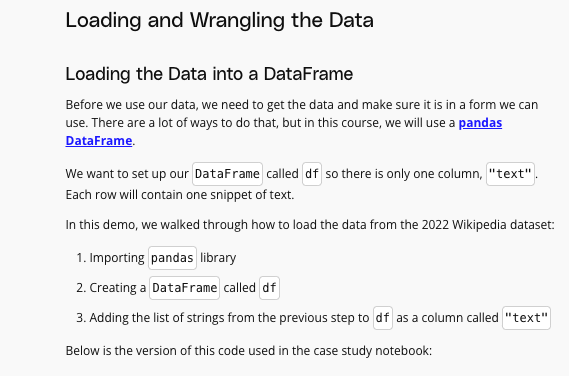

```import pandas as pd

    # Load page text into a dataframe
    df = pd.DataFrame()
    df["text"] = response_dict["query"]["pages"][0]["extract"].split("\n")
```   

__Wrangling the Data for Ingestion into the Model__

Data from the API is much cleaner than raw website source code, but it still needs some work to be ideally configured for our purposes.

In this demo, we walked through how to wrangle and clean the data in df:

1. Addressing the problem of empty rows by subsetting to include only rows where the length is > 0
2. Addressing the problem of headings by subsetting to exclude rows where the text starts with ==
3. Addressing the problem of rows without dates using a date parser and somewhat more complex logic
   
Don't worry too much about the details here; data wrangling is different for every dataset!

Below is the version of this code used in the case study notebook:
```
from dateutil.parser import parse

# Clean up text to remove empty lines and headings
df = df[(df["text"].str.len() > 0) & (~df["text"].str.startswith("=="))]

# In some cases dates are used as headings instead of being part of the
# text sample; adjust so dated text samples start with dates
prefix = ""
for (i, row) in df.iterrows():
    # If the row already has " - ", it already has the needed date prefix
    if " – " not in row["text"]:
        try:
            # If the row's text is a date, set it as the new prefix
            parse(row["text"])
            prefix = row["text"]
        except:
            # If the row's text isn't a date, add the prefix
            row["text"] = prefix + " – " + row["text"]
df = df[df["text"].str.contains(" – ")].reset_index(drop=True)
```

## Review: Numeric Representations for Text Data

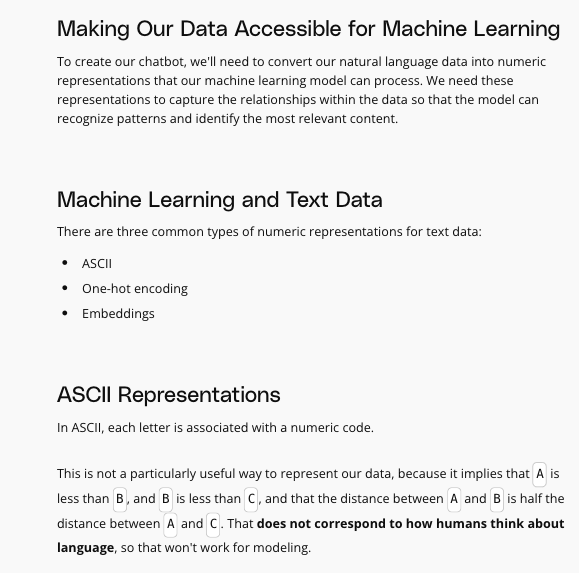 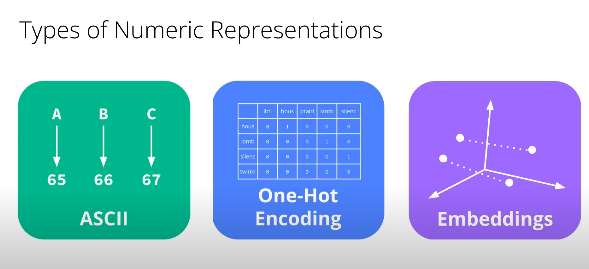 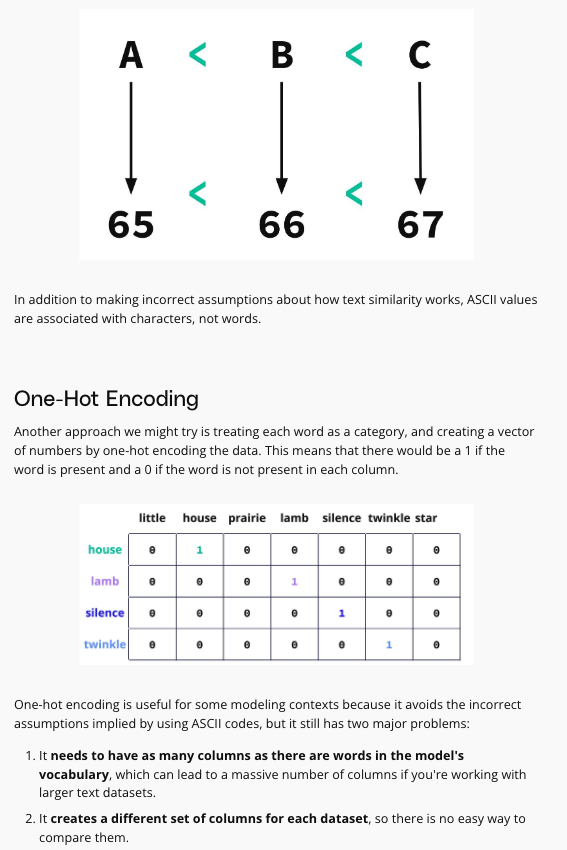

__Text Embeddings__

Embeddings are a sophisticated technique for converting text into vectors of numbers using a pre-trained machine learning model. Instead of each number in the vector indicating the presence or absence of a word, each number in the vector represents a dimension identified by the model. All text samples result in the same number of columns and we can therefore compare any two text datasets based on their embeddings!

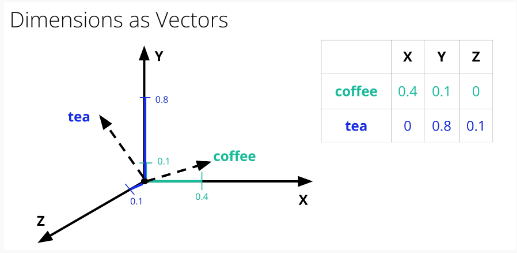



## Creating an Embedding Index

In [14]:
# Let's load the csv file to our datafram that we have saved before 

import pandas as pd

df = pd.read_csv('files/text.csv', index_col=0)
df

text
0     – 2022 (MMXXII) was a common year starting on...
1     – The year saw the removal of nearly all COVI...
2     – 2022 was also dominated by wars and armed c...
3     January 1 – The Regional Comprehensive Econom...
4    January 2 – Abdalla Hamdok resigns as Prime Mi...
..                                                 ...
180  December 21–December 26 – A major winter storm...
181  December 24 – 2022 Fijian general election: Th...
182  December 29 – Brazilian football legend Pelé d...
183  December 31 – Former Pope Benedict XVI dies at...
184  December 7 – The world population was estimate...

[185 rows x 1 columns]

In [16]:
import openai
openai.api_base = "https://openai.vocareum.com/v1"
openai.api_key = "voc-1532767545126677339448966a530fbbd0ba0.61572308"

EMBEDDING_MODEL_NAME = "text-embedding-ada-002"
response = openai.Embedding.create(
    input = df["text"].tolist(),
    model= EMBEDDING_MODEL_NAME
)

In [17]:
type(response)

openai.openai_object.OpenAIObject

In [18]:
response.keys()

dict_keys(['object', 'data', 'model', 'usage'])

In [20]:
type(response['data'])

list

In [21]:
response['data'][0]

<OpenAIObject embedding at 0x11eb17180> JSON: {
  "object": "embedding",
  "index": 0,
  "embedding": [
    4.099189391126856e-05,
    -0.01798599772155285,
    -0.017182154580950737,
    -0.012315132655203342,
    -0.009627281688153744,
    -0.001225390238687396,
    -0.00828335527330637,
    0.013162937015295029,
    -0.02260809764266014,
    -0.0020425787661224604,
    0.03011900931596756,
    0.024404184892773628,
    -0.018940560519695282,
    -0.016843032091856003,
    -0.0020912489853799343,
    0.004553019534796476,
    0.01848839968442917,
    -0.004596979822963476,
    0.021201370283961296,
    0.009696361608803272,
    0.002344020176678896,
    0.009746601805090904,
    -0.0020645589102059603,
    -0.014067260548472404,
    0.010010362602770329,
    0.01754639483988285,
    0.0045090592466294765,
    -0.004983201622962952,
    0.03589663282036781,
    -0.022947218269109726,
    -0.00015572505071759224,
    -0.010858166962862015,
    -0.01505950465798378,
    -0.0169309526681

In [22]:
response['data'][0]['embedding']

[4.099189391126856e-05,
 -0.01798599772155285,
 -0.017182154580950737,
 -0.012315132655203342,
 -0.009627281688153744,
 -0.001225390238687396,
 -0.00828335527330637,
 0.013162937015295029,
 -0.02260809764266014,
 -0.0020425787661224604,
 0.03011900931596756,
 0.024404184892773628,
 -0.018940560519695282,
 -0.016843032091856003,
 -0.0020912489853799343,
 0.004553019534796476,
 0.01848839968442917,
 -0.004596979822963476,
 0.021201370283961296,
 0.009696361608803272,
 0.002344020176678896,
 0.009746601805090904,
 -0.0020645589102059603,
 -0.014067260548472404,
 0.010010362602770329,
 0.01754639483988285,
 0.0045090592466294765,
 -0.004983201622962952,
 0.03589663282036781,
 -0.022947218269109726,
 -0.00015572505071759224,
 -0.010858166962862015,
 -0.01505950465798378,
 -0.016930952668190002,
 0.003570195287466049,
 -0.02896348387002945,
 -0.013903980143368244,
 -0.0017536975210532546,
 0.004832480568438768,
 -0.01227745320647955,
 0.012139292433857918,
 0.02115113101899624,
 0.0128238154

In [23]:
len(response['data'][0]['embedding'])

1536

In [24]:
embeddings = [data['embedding'] for data in response['data']]
embeddings

[[4.099189391126856e-05,
  -0.01798599772155285,
  -0.017182154580950737,
  -0.012315132655203342,
  -0.009627281688153744,
  -0.001225390238687396,
  -0.00828335527330637,
  0.013162937015295029,
  -0.02260809764266014,
  -0.0020425787661224604,
  0.03011900931596756,
  0.024404184892773628,
  -0.018940560519695282,
  -0.016843032091856003,
  -0.0020912489853799343,
  0.004553019534796476,
  0.01848839968442917,
  -0.004596979822963476,
  0.021201370283961296,
  0.009696361608803272,
  0.002344020176678896,
  0.009746601805090904,
  -0.0020645589102059603,
  -0.014067260548472404,
  0.010010362602770329,
  0.01754639483988285,
  0.0045090592466294765,
  -0.004983201622962952,
  0.03589663282036781,
  -0.022947218269109726,
  -0.00015572505071759224,
  -0.010858166962862015,
  -0.01505950465798378,
  -0.016930952668190002,
  0.003570195287466049,
  -0.02896348387002945,
  -0.013903980143368244,
  -0.0017536975210532546,
  0.004832480568438768,
  -0.01227745320647955,
  0.01213929243385

In [25]:
df['embeddings']= embeddings
df

text  \
0     – 2022 (MMXXII) was a common year starting on...   
1     – The year saw the removal of nearly all COVI...   
2     – 2022 was also dominated by wars and armed c...   
3     January 1 – The Regional Comprehensive Econom...   
4    January 2 – Abdalla Hamdok resigns as Prime Mi...   
..                                                 ...   
180  December 21–December 26 – A major winter storm...   
181  December 24 – 2022 Fijian general election: Th...   
182  December 29 – Brazilian football legend Pelé d...   
183  December 31 – Former Pope Benedict XVI dies at...   
184  December 7 – The world population was estimate...   

                                            embeddings  
0    [4.099189391126856e-05, -0.01798599772155285, ...  
1    [-0.011040656827390194, -0.02246847189962864, ...  
2    [-0.009661431424319744, -0.015304449945688248,...  
3    [-0.0005404727999120951, -0.024158069863915443...  
4    [-0.015138540416955948, 0.0011573187075555325,...  
..                                                 ...  
180  [-0.02478627674281597, -0.02389226108789444, 0...  
181  [-0.011605652049183846, -0.009253676049411297,...  
182  [-0.007616951130330563, 0.004034563899040222, ...  
183  [0.023607414215803146, 0.0077504320070147514, ...  
184  [-0.0015982500044628978, -0.015227421186864376...  

[185 rows x 2 columns]

In [26]:
df.to_csv('files/embeddings.csv')